In [1]:
library(tidyverse)
library(cowplot)

# Custom package
library(rutils)

-- Attaching packages ------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [3]:
text_size <- 8
label_text_size <- 10
small_text_size <- 8
guide_size <- 4
family <- "ArialMT"
dpi <- 320
fig1_ht <- 5
fig1_wd <- 6

In [4]:
figo_hm_figs <- c(load(paste0(dirs$figures_dir, "/saved_obj/figo_hms.RData")))
survival_hm_figs <- c(load(paste0(dirs$figures_dir, "/saved_obj/survival_hms.RData")))

In [5]:
set_margins <- function(plt, margins = c(0, 0, 0, 0)) {
    plt + theme(plot.margin = unit(margins, "cm"))
}

hide_legend <- function(plt) {
    plt + theme(legend.position="none")
}


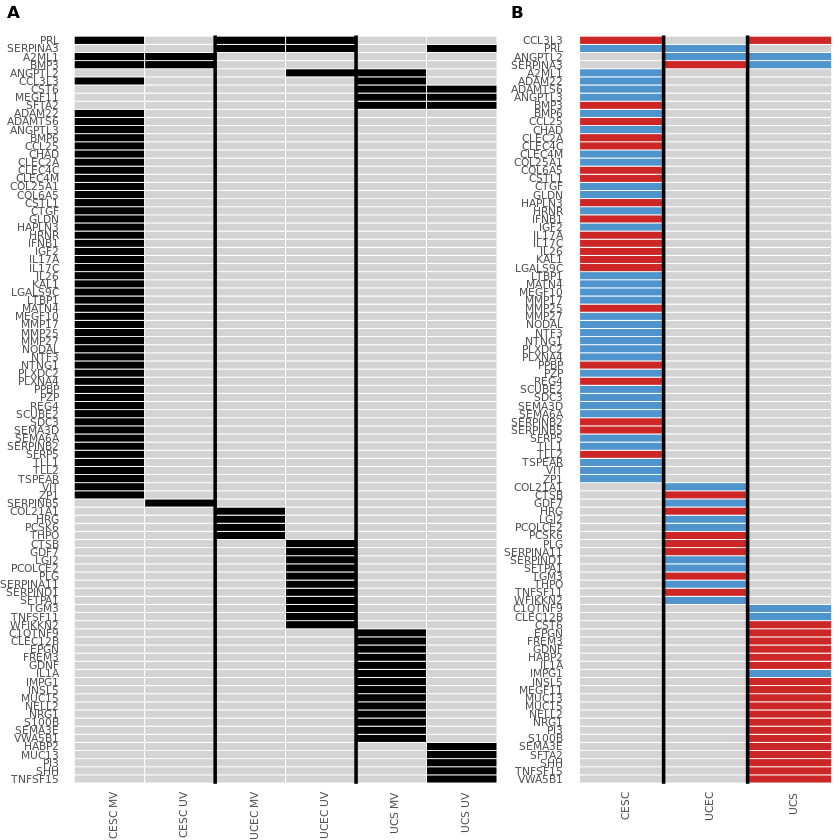

In [82]:
figo_hm_list <- c(
    c(mget("figo_subcat_hm"), mget("figo_hm")) %>%
        purrr::map(function(p) { set_margins(p, c(0.75, 0, 0, 0)) }) %>%
        purrr::map(function(p) { hide_legend(p) })
)

figo_hm_grid <- plot_grid(
    figo_hm_list[[1]],
    figo_hm_list[[2]],
    NULL,
    nrow = 2,
    rel_widths = c(1, 2/3),
    rel_heights = c(1, 0),
    labels = c("A", "B"),
    align = "vh",
    label_fontfamily = family,
    label_size = label_text_size,
    label_fontface = "bold"
)
figo_hm_grid

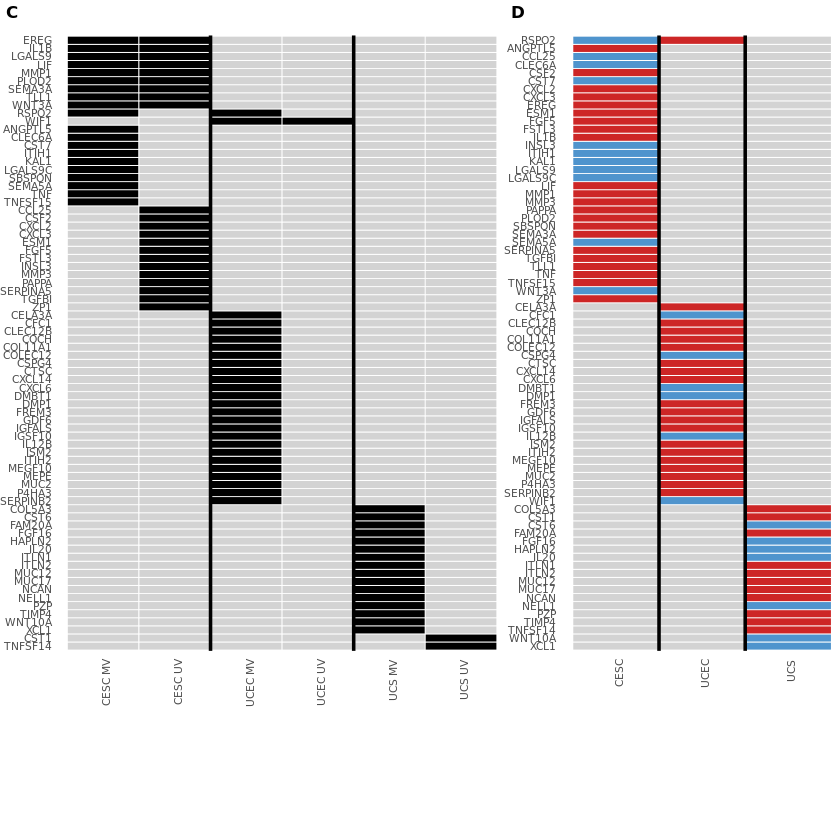

In [83]:
survival_hm_list <- c(
    c(mget("survival_subcat_hm"), mget("survival_hm")) %>%
        purrr::map(function(p) { set_margins(p, c(0.75, 0, 0, 0)) }) %>%
        purrr::map(function(p) { hide_legend(p) })
)

survival_hm_grid <- plot_grid(
    survival_hm_list[[1]],
    survival_hm_list[[2]],
    NULL,
    nrow = 2,
    rel_widths = c(1, 2/3),
    rel_heights = c(1, 0.188),
    labels = c("C", "D"),
    align = "vh",
    label_fontfamily = family,
    label_size = label_text_size,
    label_fontface = "bold"
)
survival_hm_grid

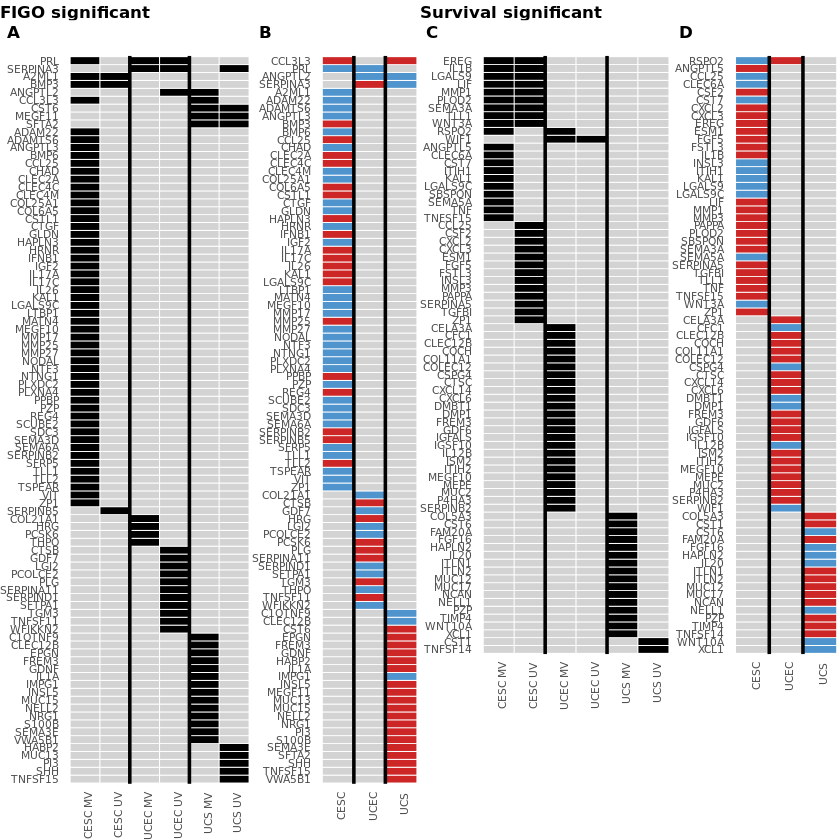

In [101]:
fig4 <- plot_grid(
#     plotlist = list(figo_hm_grid, survival_hm_grid),
    NULL,
    NULL,
    figo_hm_grid,
    survival_hm_grid,
    rel_heights = c(0.025, 1),
    ncol = 2,
    align = "vh",
#     axis = "none",
    labels = c("FIGO significant", "Survival significant"),
    label_fontfamily = family,
    label_size = label_text_size,
    label_fontface = "bold",
    hjust = 0
)
fig4

In [102]:
ggsave(fig4, filename = paste0(dirs$figures_dir, "/paneled/figure4.png"), dpi = dpi, height = 9, width = 6)